In [1]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.integrate import odeint
from gekko import GEKKO
from scipy.integrate import simpson

# Contrôle optimal - T.P. no 2
## Modèle SIR, stratégie optimale de confinement

# Optimisation de la Stratégie de Confinement pour Limiter la Propagation d'une Épidémie

Le coronavirus a généré une épidémie d’une telle ampleur que des milliards de personnes dans plus de 50 pays ont été confinées depuis le début du mois d’avril 2020. En particulier, la question du **confinement/déconfinement** est devenue un enjeu crucial.

Dans ce T.P., nous cherchons à déterminer une stratégie optimale de mise en place de mesures de restriction sur une population afin de lutter contre la propagation d’une épidémie. La question que l’on souhaite résoudre s’énonce ainsi :  
**Comment optimiser l’action des pouvoirs publics pour limiter le nombre de personnes infectées ?**

## Modèle SIR Simplifié

Nous allons considérer le modèle SIR (Susceptible-Infected-Removed) simplifié décrit dans [2] :

$$
\begin{cases}
S'(t) = -u(t) \frac{S(t) I(t)}{N(t)}, & t \geq 0, \\
I'(t) = u(t) \frac{S(t) I(t)}{N(t)} - \beta I(t), \\
R'(t) = \beta I(t), \\
(S(0), I(0), R(0)) = (S_0, R_0, I_0).
\end{cases}
$$

Dans ce modèle :
- $S(t)$ : nombre de personnes saines au temps $t$,
- $I(t)$ : nombre de personnes infectées,
- $R(t)$ : nombre de personnes retirées (guéries ou décédées),
- $u(·)$ : contrôle modélisant une politique de restriction (ex. confinement).

Il s’agit d’une fonction de $L^\infty(\mathbb{R}^+)$ à valeurs dans $[0, \alpha]$ :
- $u(·) = 0$ modélise un confinement total,
- $u(·) = \alpha$ modélise l’absence de confinement.

Les paramètres :
- $\alpha$ : taux d’infection de la maladie,
- $\beta$ : taux d’élimination.

### Contexte Épidémique en France en Avril 2020

Les auteurs de [1] estiment les paramètres $\alpha \approx 0.32$ et $\beta = 1/10$, avec un taux de reproduction du virus $R_0 = \frac{\alpha}{\beta} \approx 3.2$. Pour ce modèle, puisque $R_0 > 1$, $I$ atteint un maximum puis tend vers zéro en raison de l’immunité de groupe.

- Population totale : $N \approx 6.7 \times 10^7$
- Fenêtre de temps : $[0, T]$ avec $T = 90$ jours

**Valeurs numériques utilisées dans ce TP :**

| $\alpha$ | $\beta$ | $S_0$     | $I_0$  | $R_0$ | $T$ |
|:--------:|:-------:|:---------:|:------:|:-----:|:---:|
| 0.32     | 0.1     | 6.7e7 − 2e4 | 2e4 | 0     | 90  |

## Stratégie de Restriction Optimale

La recherche d’une stratégie optimale se modélise par :

$$
\inf_{u \in U_\alpha} L_\tau(u) \quad \text{avec} \quad U_\alpha = \{u \in L^\infty(]0, T [) \mid 0 \leq u(·) \leq \alpha\} \quad (P_\tau)
$$

où $\tau \in [0, 1]$ est fixé et

$$
L_\tau(u) = \tau \int_0^T g(u(t)) \, dt + (1 - \tau) \int_0^T f(I(t)) \, dt.
$$

Les fonctions :
- $g(u)$ : supposée $C^1$, positive et décroissante sur $[0, \alpha]$,
- $f(I)$ : supposée $C^1$, positive et croissante.

Exemples de fonctions :
$$
g(u) = \frac{1}{2} (\alpha^2 - u^2), \quad f(I) = \frac{I^2}{2} \quad \text{ou} \quad f(I) = I.
$$

## Questions

1. **Modélisation** : Justifier le choix de la fonctionnelle $L_\tau$.
2. **Constance de $N(·)$** : Vérifier que la fonction $N(·)$ est constante.
3. **Cas de Contrôles Constants** : Dans les cas suivants, représenter les solutions $S$, $I$ et $R$ du système sur $[0, T]$ :
   - $u(·) = \alpha$ (pas de confinement),
   - $u(·) = \epsilon$ (avec $\epsilon > 0$ proche de 0, confinement fort).
   
   Utiliser une méthode de Runge-Kutta d’ordre 4 pour résoudre le système SIR et interpréter les résultats obtenus.

### Rappel
On rappelle que pour résoudre l’EDO $x′ = f(t, x)$, la méthode de Runge-Kutta d’ordre 4 consiste à utiliser le schéma :
$$
x_{n+1} = x_n + \frac{h_n}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$
avec :
$$
\begin{aligned}
k_1 &= f(t_n, x_n), \\
k_2 &= f(t_n + \frac{h_n}{2}, x_n + \frac{h_n k_1}{2}), \\
k_3 &= f(t_n + \frac{h_n}{2}, x_n + \frac{h_n k_2}{2}), \\
k_4 &= f(t_n + h_n, x_n + h_n k_3).
\end{aligned}
$$

4. **Calcul du Gradient** : Soit $u \in U_\alpha$ et $h \in L^\infty(]0, T [)$ une perturbation admissible de $u$. Montrer que la différentielle $DL_\tau(u) \cdot h$ s’écrit :

   $$
   DL_\tau(u) \cdot h = \lim_{\epsilon \to 0} \frac{L_\tau(u + \epsilon h) - L_\tau(u)}{\epsilon} = \int_0^T h \left(\tau g'(u) + (1 - \tau) \frac{SI}{N}(P_2 - P_1)\right) dt,
   $$

   où $P$ désigne l’état adjoint, solution du système :
   
   $$
   \begin{aligned}
   - \frac{d}{dt} \begin{pmatrix} P_1 \\ P_2 \\ P_3 \end{pmatrix} &= A^T \begin{pmatrix} P_1 \\ P_2 \\ P_3 \end{pmatrix} + \begin{pmatrix} 0 \\ f'(I) \\ 0 \end{pmatrix}, \\
   P_i(T) &= 0,
   \end{aligned}
   $$
   
   avec :

   $$
   A = \begin{pmatrix}
   - \frac{uI}{N} & - \frac{uS}{N} & 0 \\
   \frac{uI}{N} & \frac{uS}{N} - \beta & 0 \\
   0 & \beta & 0
   \end{pmatrix}.
   $$

   On note $\nabla L_\tau(u) = \tau g'(u) + (1 - \tau) \frac{SI}{N}(P_2 - P_1)$.

5. **mise en œuvre d’une méthode de gradient** Mettre en œuvre une méthode de type gradient pour résoudre le problème $(P_\tau)$.

L’exposant $k$ est utilisé pour désigner les différentes variables du problème à l’itération $k$ et $\rho_k > 0$ désigne le pas de la méthode de contrôle. On suggère de suivre les étapes suivantes :

- Utiliser la formule de projection
  $$
  u^{k+1} = \min\{\alpha, \max\{u^k - \rho_k \nabla L_\tau (u^k), 0\}\}
  $$
  pour mettre à jour le contrôle.
- Le pas $\rho_k$ peut être choisi variable, suivant l’algorithme ci-après.
- On imposera un nombre maximal d’itérations. Si ce nombre est atteint, on considérera que l’algorithme n’a pas convergé.
- On utilisera un critère d’arrêt de la forme

$$
\left| \frac{L_\tau (u^{k+1}) - L_\tau (u^k)}{L_\tau (u^k)} \right| \leq \epsilon_{\text{tol}}
$$
où $\epsilon_{\text{tol}} > 0$ est fixé.


Algorithme pour choisir le pas $\rho_k$ :

```python
cpt = 0
ρ = ρ0  # un nombre positif fixé
∆ = Lτ(u^k - ρ * ∇Lτ(u^k)) - Lτ(u^k)

while (cpt < 1e2) and (∆ >= 0):
    ρ = ρ / 1.3
    ∆ = Lτ(u^k - ρ * ∇Lτ(u^k)) - Lτ(u^k)
    cpt += 1





6. Représenter pour différentes valeurs de $τ$, la solution optimale $u^*_{τ}$ obtenue, les trajectoires optimales $(S^*_{τ}, I^*_{τ}, R^*_{τ})$ associées, l’évolution du critère en fonction des itérations. On testera les trois différentes initialisations suivantes de l’algorithme et on retiendra celle ayant permis d’attendre la valeur du critère la plus basse :
   - $u_0(t) = α1_{[0,T]}(t)$, (pas de confinement)
   - $u_0(t) = \frac{α}{2} 1_{[0,T]}(t)$, (confinement moyen)
   - $u_0(t) = ε1_{[0,T]}(t)$, (confinement presque total) avec $ε > 0$ proche de 0.

7. Voici quelques pistes si vous souhaitez aller plus loin.

   (a) Représenter sur une figure les points
       $$
       \left( \int_0^T g(u^*_{τ}(t)) \, dt, \int_0^T f(I^*_{τ}(t)) \, dt \right)
       $$
       pour différentes valeurs de $τ ∈ [0, 1]$ (diagramme de Pareto). Comment interpréter ce diagramme ?
       
   (b) Implémenter le problème en utilisant le package Gekko et comparer les résultats obtenus.
   
   
   (c) Comment modifier ou enrichir la modélisation proposée ? N’hésitez pas à tester les modélisations proposées.

Références  
[1] Santé Publique France (2020). COVID-19.  
[2] Lionel Roques, Etienne Klein, Julien Papaïx, Antoine Sar, and Samuel Soubeyrand, Using early data to estimate the actual infection fatality ratio from COVID-19 in France, Biology 2020, 9, 97.


# Réponse 
Nous allons considérer le modèle SIR (Susceptible-Infected-Removed) simplifié décrit dans [2] :

$$
\begin{cases}
S'(t) = -u(t) \frac{S(t) I(t)}{N(t)}, & t \geq 0, \\
I'(t) = u(t) \frac{S(t) I(t)}{N(t)} - \beta I(t), \\
R'(t) = \beta I(t), \\
(S(0), I(0), R(0)) = (S_0, R_0, I_0).
\end{cases}
$$

Dans ce modèle :
- $S(t)$ : nombre de personnes saines au temps $t$,
- $I(t)$ : nombre de personnes infectées,
- $R(t)$ : nombre de personnes retirées (guéries ou décédées),
- $u(·)$ : contrôle modélisant une politique de restriction (ex. confinement).

Il s’agit d’une fonction de $L^\infty(\mathbb{R}^+)$ à valeurs dans $[0, \alpha]$ :
- $u(·) = 0$ modélise un confinement total,
- $u(·) = \alpha$ modélise l’absence de confinement.

Les paramètres :
- $\alpha$ : taux d’infection de la maladie,
- $\beta$ : taux d’élimination.



## Question 1: **Modélisation** : Justifier le choix de la fonctionnelle $L_\tau$.

# Réponse

La fonctionnelle $ L_\tau$ est choisie pour équilibrer deux objectifs :

- Minimiser les restrictions (représentées par $ g(u)$) : Dans ce cas, $ g$ est choisie décroissante sur $[0, \alpha]$. Plus $ u(t)$ est élevé, plus le coût est fiable.
- Minimiser le nombre de personnes infectées (représenté par $ f(I)$) : Dans ce cas, $ f$ est croissante, ce qui signifie que si $ I(t)$ est élevé, le coût est plus élevé.

Le paramètre $ \tau$ permet d'ajuster l'importance relative de ces deux objectifs.


## Question 2: **Constance de $N(·)$** : Vérifier que la fonction $N(·)$ est constante.

Dans le modèle SIR, la quantité $ N(t) = S(t) + I(t) + R(t) $ représente la population totale. Pour montrer que $ N(t) $ est constante, dérivons $ N(t) $ par rapport au temps $ t $ :

$$
N'(t) = S'(t) + I'(t) + R'(t).
$$

En remplaçant $ S'(t) $, $ I'(t) $, et $ R'(t) $ par les équations du modèle SIR, nous obtenons :

$$
N'(t) = -u(t) \frac{S(t) I(t)}{N(t)} + \left( u(t) \frac{S(t) I(t)}{N(t)} - \beta I(t) \right) + \beta I(t).
$$

Après simplification, tous les termes s'annulent :

$$
N'(t) = 0.
$$

Ainsi, $ N'(t) = 0 $ implique que $ N(t) $ est constant pour tout $ t \geq 0 $.


## Question 3: **Cas de Contrôles Constants** : Dans les cas suivants, représenter les solutions $S$, $I$ et $R$ du système sur $[0, T]$ :

   - $u(·) = \alpha$ (pas de confinement),
   - $u(·) = \epsilon$ (avec $\epsilon > 0$ proche de 0, confinement fort).
   
Utiliser une méthode de Runge-Kutta d’ordre 4 pour résoudre le système SIR et interpréter les résultats obtenus.

On rappelle que pour résoudre l’EDO $x′ = f(t, x)$, la méthode de Runge-Kutta d’ordre 4 consiste à utiliser le schéma :
$$
x_{n+1} = x_n + \frac{h_n}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$
avec :
$$
\begin{aligned}
k_1 &= f(t_n, x_n), \\
k_2 &= f(t_n + \frac{h_n}{2}, x_n + \frac{h_n k_1}{2}), \\
k_3 &= f(t_n + \frac{h_n}{2}, x_n + \frac{h_n k_2}{2}), \\
k_4 &= f(t_n + h_n, x_n + h_n k_3).
\end{aligned}
$$
   

On commence à implémenter ce code et interpréter les résultats obtenus.

In [2]:
# implementation méthode RK4_s
def RK4(u, beta, S0, I0, R0, T, dt):
    n = int(T / dt)
    T = np.zeros(n + 1)
    S = np.zeros(n + 1)
    I = np.zeros(n + 1)
    R = np.zeros(n + 1)
    u = u * np.ones(n + 1)
    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    T[0] = 0.0

    for i in range(n):
        # la population totale
        tot = S[i] + I[i] + R[i]
        
        # pour S
        K1_s = -u[i] * S[i] * I[i] / tot
        K2_s = -u[i] * (S[i] + K1_s * dt / 2) * (I[i] + K1_s * dt / 2) / tot
        K3_s = -u[i] * (S[i] + K2_s * dt / 2) * (I[i] + K2_s * dt / 2) / tot
        K4_s = -u[i] * (S[i] + K3_s * dt) * (I[i] + K3_s * dt) / tot
        
        # pour I
        K1_i = u[i] * S[i] * I[i] / tot - beta * I[i]
        K2_i = u[i] * (S[i] + K1_s * dt / 2) * (I[i] + K1_i * dt / 2) / tot - beta * (I[i] + K1_i * dt / 2)
        K3_i = u[i] * (S[i] + K2_s * dt / 2) * (I[i] + K2_i * dt / 2) / tot - beta * (I[i] + K2_i * dt / 2)
        K4_i = u[i] * (S[i] + K3_s * dt) * (I[i] + K3_i * dt) / tot - beta * (I[i] + K3_i * dt)
        
        # pour R
        K1_r = beta * I[i]
        K2_r = beta * (I[i] + K1_i * dt / 2)
        K3_r = beta * (I[i] + K2_i * dt / 2)
        K4_r = beta * (I[i] + K3_i * dt)
        
        S[i + 1] = S[i] + (K1_s + 2 * K2_s + 2 * K3_s + K4_s) * dt / 6
        I[i + 1] = I[i] + (K1_i + 2 * K2_i + 2 * K3_i + K4_i) * dt / 6
        R[i + 1] = R[i] + (K1_r + 2 * K2_r + 2 * K3_r + K4_r) * dt / 6
        T[i + 1] = T[i] + dt

    return S, I, R, T



On va tracer les courbes  pour $u=\alpha$

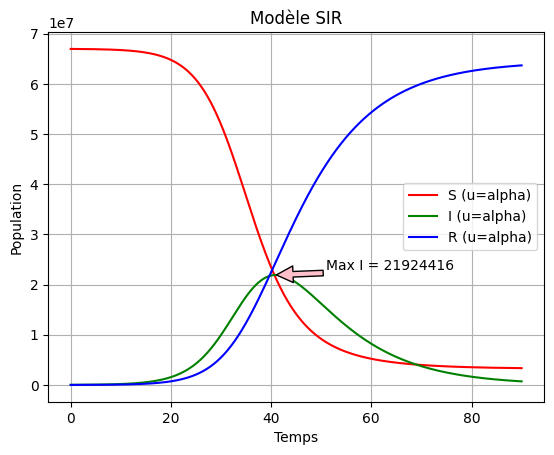

In [3]:
alpha = 0.32
beta = 0.1
T = 90
dt = 0.1
S0 = 6.7e7 - 2e4
I0 = 2e4
R0 = 0
S, I, R, t = RK4(alpha, beta, S0, I0, R0, T, dt)
# Trouver le point maximum de la courbe verte (infectés)
I_max = np.max(I)
t_max = t[np.argmax(I)]

# Tracer les courbes
plt.plot(t, S, label="S (u=alpha)", color="red")
plt.plot(t, I, label="I (u=alpha)", color="green")
plt.plot(t, R, label="R (u=alpha)", color="blue")

# Ajouter une flèche et annoter le point maximum
plt.annotate(f'Max I = {I_max:.0f}', xy=(t_max, I_max), xytext=(t_max + 10, I_max + 1e6),
             arrowprops=dict(facecolor='pink', shrink=0.005))

# Ajouter des légendes et des labels
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Modèle SIR')
plt.grid(True)
plt.show()

Pour $ u = \alpha $, dans ce cas, il n'y a pas de confinement. Le nombre de personnes saines diminue rapidement car elles sont fortement exposées aux personnes infectées, ce qui augmente le taux de transmission. L’évolution du nombre cumulé de personnes infectées suit une dynamique exponentielle au début de l’épidémie, jusqu’à ce qu’environ la moitié de la population totale soit infectée. Cette croissance rapide ralentit ensuite en raison de la raréfaction des individus sains, de l’augmentation des individus immunisés, et des mesures prises contre l’épidémie. On observe un moment où le nombre de personnes infectées $ I $ atteint un maximum (voir courbe verte dans le graphique ci-dessus), calculable par simulation numérique. Cela signifie que la pression sur le système de santé atteint également un maximum.

On va tracer les courbes  pour un $u=\epsilon$

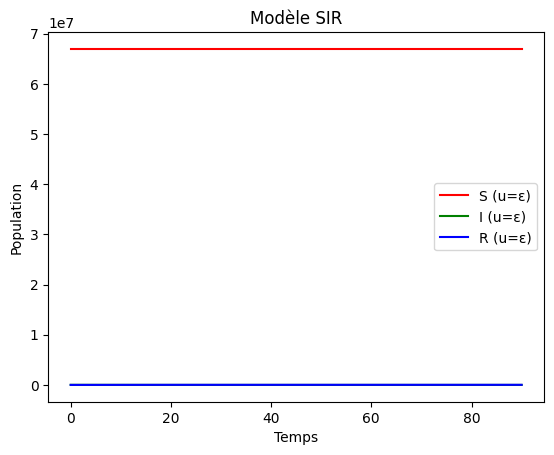

In [4]:
epsilon = 2e-8
beta = 0.1
T = 90
dt = 0.1
S0 = 6.7e7 - 2e4
I0 = 2e4
R0 = 0
S, I, R, T = RK4(epsilon, beta, S0, I0, R0, T, dt)
# tracer les courbes
plt.plot(T, S, label="S (u=ε)", color="red")
plt.plot(T, I, label="I (u=ε)", color="green")
plt.plot(T, R, label="R (u=ε)", color="blue")
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Modèle SIR')
plt.show()

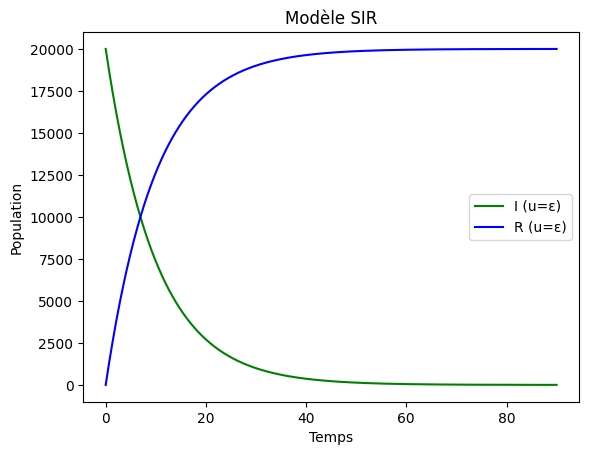

In [5]:
epsilon = 2e-8
beta = 0.1
T = 90
dt = 0.1
S0 = 6.7e7 - 2e4
I0 = 2e4
R0 = 0
S, I, R, T = RK4(epsilon, beta, S0, I0, R0, T, dt)
# tracer les courbes
# plt.plot(T, S, label="S (u=ε)", color="red")
plt.plot(T, I, label="I (u=ε)", color="green")
plt.plot(T, R, label="R (u=ε)", color="blue")
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Modèle SIR')
plt.show()

Pour $u = \epsilon$, il y a confinement. J'ai essayé de tracer deux figures : une avec $S$ (personnes saines) et une sans $S$, afin d'illustrer clairement comment le modèle décrit le problème.

Dans la première figure, on observe que le nombre de personnes saines et infectées reste constant avec le temps. Cela est logique pour les personnes saines, car il n'y a pas d'interactions significatives avec les personnes infectées. En revanche, dans ce cas, puisque le confinement est strict, on voit bien dans la deuxième figure que le nombre d'infectés augmente jusqu'à atteindre un certain seuil, puis se stabilise. 

Ce phénomène s’explique par le fait qu’il n’y a pas de contacts entre les malades et les personnes saines. De plus, les malades déjà atteints sont bien pris en charge, ce qui contribue à limiter la propagation de l’épidémie. Ces malades deviennent une forme de "barrière" contre la transmission de la maladie.


# Question 4: **Calcul du Gradient** : Soit $u \in U_\alpha$ et $h \in L^\infty(]0, T [)$ une perturbation admissible de $u$. 

Montrer que la différentielle $DL_\tau(u) \cdot h$ s’écrit :

   $$
   DL_\tau(u) \cdot h = \lim_{\epsilon \to 0} \frac{L_\tau(u + \epsilon h) - L_\tau(u)}{\epsilon} = \int_0^T h \left(\tau g'(u) + (1 - \tau) \frac{SI}{N}(P_2 - P_1)\right) dt,
   $$

   où $P$ désigne l’état adjoint, solution du système :
   
   $$
   \begin{aligned}
   - \frac{d}{dt} \begin{pmatrix} P_1 \\ P_2 \\ P_3 \end{pmatrix} &= A^T \begin{pmatrix} P_1 \\ P_2 \\ P_3 \end{pmatrix} + \begin{pmatrix} 0 \\ f'(I) \\ 0 \end{pmatrix}, \\
   P_i(T) &= 0,
   \end{aligned}
   $$
   
   avec :

   $$
   A = \begin{pmatrix}
   - \frac{uI}{N} & - \frac{uS}{N} & 0 \\
   \frac{uI}{N} & \frac{uS}{N} - \beta & 0 \\
   0 & \beta & 0
   \end{pmatrix}.
   $$

   On note $\nabla L_\tau(u) = \tau g'(u) + (1 - \tau) \frac{SI}{N}(P_2 - P_1)$.

## Réponce

Nous avons le systéme des equation de SIR :

$$
\begin{cases}
S'(t) = -u(t) \frac{S(t) I(t)}{N(t)}, & t \geq 0, \\
I'(t) = u(t) \frac{S(t) I(t)}{N(t)} - \beta I(t), \\
R'(t) = \beta I(t), \\
(S(0), I(0), R(0)) = (S_0, R_0, I_0).
\end{cases}
$$

On peut écrire le système SIR sous la forme d'une fonction $ F $ telle que

$$
\begin{cases}
X' = F(X, u) \\
X(0) = X_0
\end{cases}
$$

Nous noterons $ g(u) = g(u(t)) $ et $ f(u) = f(I(t)) $ pour simplifier l'écriture.

Ainsi, nous avons :

$$
L(u) = \tau \int_0^T g(u) \, dt + (1 - \tau) \int_0^T f(X) \, dt
$$

Notre objectif est de trouver, pour toute perturbation admissible $ h $ de $ u \in U_\alpha $, une expression telle que

$$
DL(u) \cdot h = \langle \text{"machin"}, h \rangle 
$$

avec $\text{"machin"} = \nabla L(u)$.

Étant donné que $ \dot{X} = DX(u) \cdot h $ et $ D_u u \cdot h = \dot{u} = h $, alors :

$$
DL(u) \cdot h = \tau \int_0^T g'(u) \dot{u} \, dt + (1 - \tau) \int_0^T f'(X) \dot{X} \, dt =\tau \int_0^T g'(u) h \, dt + (1 - \tau) \int_0^T f'(X) \dot{X} \, dt.
$$

Or,

$$
\begin{cases}
\dot{X}' = \partial_X F(X, u) \dot{X} + \partial_u F(X, u) h = A \dot{X} + B h \\
\dot{X}(0) = 0
\end{cases}
$$

où $ A $ est la matrice jacobienne de $ F(X, u) $. On calcule $A$ :


$$
A = \text{Jac}(F) = \text{Jac}\begin{pmatrix} F_1 \\ F_2 \\ F_3 \end{pmatrix} = \begin{pmatrix}
\frac{\partial F_1}{\partial S} & \frac{\partial F_1}{\partial I} & \frac{\partial F_1}{\partial R} \\ 
\frac{\partial F_2}{\partial S} & \frac{\partial F_2}{\partial I} & \frac{\partial F_2}{\partial R} \\ 
\frac{\partial F_3}{\partial S} & \frac{\partial F_3}{\partial I} & \frac{\partial F_3}{\partial R} 
\end{pmatrix}
= \begin{pmatrix}
- \frac{uI}{N} & - \frac{uS}{N} & 0 \\
\frac{uI}{N} & \frac{uS}{N} - \beta & 0 \\
0 & \beta & 0
\end{pmatrix}.
$$

De même pour $ f $.

$$
B = \frac{\partial F(X, u) }{\partial u} =  \frac{\partial }{\partial u} \begin{pmatrix} F_1 \\ F_2 \\ F_3 \end{pmatrix} = \begin{pmatrix} -\frac{SI}{N} \\ \frac{SI}{N} \\ 0 \end{pmatrix}
$$

Ensuite, nous introduisons le dual $ P $, défini comme suit :

$$
\begin{cases}
- P' = A^T P + \text{"Truc"} \\
P(T) = \text{"truc\_2"}
\end{cases}
$$

En multipliant les deux équations et en intégrant par parties, nous obtenons :

$$
\int_0^T \langle \dot{X}', P \rangle \, dt = \int_0^T \langle A \dot{X}, P \rangle \, dt + \int_0^T \langle B h, P \rangle \, dt - \int_0^T \langle \dot{X}, P' \rangle \, dt + \dot{X}(T) P(T) - \dot{X}(0) P(0) \quad (*)
$$

Ce qui équivaut à :

$$
\int_0^T \langle \dot{X}', P \rangle \, dt  = \int_0^T \langle \dot{X}, A^T P \rangle \, dt + \int_0^T \langle \dot{X}, \text{"truc"} \rangle \, dt + \dot{X}(T) \text{"truc\_2"} \quad (**)
$$

Étant donné que $ * = ** $ et après simplification, nous obtenons :

$$
\int_0^T \langle B h, P \rangle \, dt = \int_0^T \langle \dot{X}, \text{"truc"} \rangle \, dt + \dot{X}(T) \text{"truc\_2"}
$$

En posant $ \text{"truc\_2"} = 0 $ et $ \text{"truc"} = f'(X) $, nous avons alors :

$$
\int_0^T \langle B^T P, h \rangle \, dt = \int_0^T \langle \dot{X}, f'(X) \rangle \, dt
$$

et finalement :

$$
DL(u) \cdot h = \tau \int_0^T g'(u) h \, dt +  (1 - \tau) \int_0^T \langle B^T P, h \rangle \, dt.
$$

Ainsi,

$$
\nabla L_\tau = \tau g'(u) + (1 - \tau) \underline{\partial_u F(X, u) P}_{B^T P}
$$

Or,

$$
\partial_u F(X, u) \cdot P = \begin{pmatrix} -\frac{SI}{N} \\ \frac{SI}{N} \\ 0 \end{pmatrix} \cdot \begin{pmatrix} P_1 \\ P_2 \\ P_3 \end{pmatrix} = (1 - \tau) \frac{SI}{N} (P_2 - P_1)
$$

Ce qui donne :

$$
DL_\tau(u) \cdot h = \lim_{\epsilon \to 0} \frac{L_\tau(u + \epsilon h) - L_\tau(u)}{\epsilon} = \int_0^T h \left( \tau g'(u) + (1 - \tau) \frac{SI}{N}(P_2 - P_1) \right) \, dt,
$$

où $ P $ désigne l’état adjoint, solution du système :


$$
\begin{cases}
- \frac{d}{dt} \begin{pmatrix} P_1 \\ P_2 \\ P_3 \end{pmatrix} &= A^T \begin{pmatrix} P_1 \\ P_2 \\ P_3 \end{pmatrix} + \begin{pmatrix} 0 \\ f'(I) \\ 0 \end{pmatrix}, \\
P_i(T) &= 0,
\end{cases}
$$

avec :

$$
A = \begin{pmatrix}
- \frac{uI}{N} & - \frac{uS}{N} & 0 \\
\frac{uI}{N} & \frac{uS}{N} - \beta & 0 \\
0 & \beta & 0
\end{pmatrix}.
$$

Finalement, on obtient :

$$
\nabla L_\tau(u) = \tau g'(u) + (1 - \tau) \frac{SI}{N}(P_2 - P_1).
$$


# Question 5: **mise en œuvre d’une méthode de gradient** Mettre en œuvre une méthode de type gradient pour résoudre le problème $(P_\tau)$.

L’exposant $k$ est utilisé pour désigner les différentes variables du problème à l’itération $k$ et $\rho_k > 0$ désigne le pas de la méthode de contrôle. On suggère de suivre les étapes suivantes :

- Utiliser la formule de projection
  $$
  u^{k+1} = \min\{\alpha, \max\{u^k - \rho_k \nabla L_\tau (u^k), 0\}\}
  $$
  pour mettre à jour le contrôle.
- Le pas $\rho_k$ peut être choisi variable, suivant l’algorithme ci-après.
- On imposera un nombre maximal d’itérations. Si ce nombre est atteint, on considérera que l’algorithme n’a pas convergé.
- On utilisera un critère d’arrêt de la forme

$$
\left| \frac{L_\tau (u^{k+1}) - L_\tau (u^k)}{L_\tau (u^k)} \right| \leq \epsilon_{\text{tol}}
$$
où $\epsilon_{\text{tol}} > 0$ est fixé.

```python
cpt = 0
ρ = ρ0  # un nombre positif fixé
∆ = Lτ(u^k - ρ * ∇Lτ(u^k)) - Lτ(u^k)

while (cpt < 1e2) and (∆ >= 0):
    ρ = ρ / 1.3
    ∆ = Lτ(u^k - ρ * ∇Lτ(u^k)) - Lτ(u^k)
    cpt += 1



## Réponse

D'abord, voici la méthode de résolution que nous utilisons, décrite sous forme d'algorithme :

Initialisation de $ u_0 \in L^2 $ et $ \rho > 0 $.

### 1. Calcul du primal (équation d'état)

Nous résolvons le système d'équations différentielles suivantes :

$$
\begin{cases}
S'(t) = -u(t) \frac{S(t) I(t)}{N(t)}, & t \geq 0, \\
I'(t) = u(t) \frac{S(t) I(t)}{N(t)} - \beta I(t), \\
R'(t) = \beta I(t), \\
(S(0), I(0), R(0)) = (S_0, I_0, R_0).
\end{cases}
$$

### 2. Calcul du dual

Le système dual est résolu à partir de l'équation suivante :

$$
\begin{cases}
- \frac{d}{dt} \begin{pmatrix} P_1 \\ P_2 \\ P_3 \end{pmatrix} = A^T \begin{pmatrix} P_1 \\ P_2 \\ P_3 \end{pmatrix} + \begin{pmatrix} 0 \\ f'(I) \\ 0 \end{pmatrix}, \\
P_i(T) = 0, 
\end{cases}
$$

### 3. Mise à jour de $ u $

La mise à jour de la solution pour le contrôle $ u $ est effectuée selon la règle suivante :

$$
u^{k+1} = u^k - \rho P^k.
$$
pour mis à jour $u$ on utilise la méthode  proposé par l'exercice la formile de projection 

### Pour implémenter la méthode de gradient :

Nous allons nous inspirer de ce que nous avons fait l'année dernière et ajuster notre approche pour correspondre à notre système. Nous commencerons par implémenter les fonctions $ g $, $ f $ et leurs dérivées, ainsi que l'application $ L $ et sa différentiabilité $ DL $, qui régissent notre système.

### Remarque 

Pour le calcul du **primal**, nous utiliserons la méthode de Runge-Kutta, qui a déjà été implémentée. Toutefois, pour le **dual**, nous devons apporter une légère modification. En effet, nous ne connaissons pas la solution au temps $ t = 0 $, mais nous connaissons la condition à $ t = T $ telle que $ P(T) = 0 $.


In [169]:

# Système SIR
def model_SIR(S, I, R, u, N):
    dS = -u * S * I / N
    dI = u * S * I / N - beta * I
    dR = beta * I
    return dS, dI, dR

# Fonctions g et f
def fonction_g(alpha, u):
    return 0.5 * (alpha**2 - u**2)

def fonction_f(I):
    return 0.5 * I**2

# Dérivées de g et f
def g_derive(u):
    return -u

def f_derive(I):
    return I

# Fonction L_tau avec la méthode de Simpson de SciPy
def L_tau_simpson(u, I, tau, dt):
    integral_g = tau * simpson(fonction_g(alpha, u), dx=dt)
    integral_f = (1 - tau) * simpson(fonction_f(I), dx=dt)
    return integral_g + integral_f

# Gradient de L_tau par rapport à u
def gradient_L_tau(S, I, R, u,P1, P2, tau,N):
    grad = tau * g_derive(u) + (1 - tau) * (S * I / N) * (P2 - P1)
    return grad

In [189]:
# Fonction qui calcule le pas optimal
def Pas_Optimal(S, I, R, u, grad, dt, N, tau, rho0, max_iter=100):
    rho = rho0
    delta = L_tau_simpson(u - rho * grad, I, tau, dt) - L_tau_simpson(u, I, tau, dt)
    # print('delta avat de rentrer dans la boucle ', delta)
    
    cpt = 0
    while cpt < max_iter and delta >= 0:
        delta = L_tau_simpson(u - rho * grad, I, tau, dt) - L_tau_simpson(u, I, tau, dt)
        if delta < 0:
            break
        rho /= 1.3
        cpt += 1
    return rho

# Fonction qui calcule la formule de projection pour mettre à jour le contrôle u
def Forme_project(S, I, R, u, dt, N, tau, rho0,P1,P2):
    # Calculer le gradient de L_tau par rapport à u
    grad = gradient_L_tau(S, I, R, u,P1,P2, tau, N)
    
    # Calculer le pas optimal
    rho = Pas_Optimal(S, I, R, u, grad, dt, N, tau, rho0)
    
    # Mettre à jour u
    u_new = u - rho * grad
    
    # Appliquer les contraintes sur u
    u_new = np.minimum(alpha, np.maximum(u_new, 0))
    return u_new


# Méthode de Runge-Kutta d'ordre 4 pour l'adjoint
def RK4_adjoint(u, beta, P1_T, P2_T, P3_T, T, dt, S, I, R, N):
    n = int(T / dt)
    t = np.linspace(0, T, n + 1)
    P1 = np.zeros(n + 1)
    P2 = np.zeros(n + 1)
    P3 = np.zeros(n + 1)
    
    P1[-1] = P1_T
    P2[-1] = P2_T
    P3[-1] = P3_T

    for i in reversed(range(n)):
        A = np.array([
            [-u[i] * I[i] / N, -u[i] * S[i] / N, 0],
            [u[i] * I[i] / N, u[i] * S[i] / N - beta, 0],
            [0, beta, 0]
        ])
        K1_P = -A.T @ np.array([P1[i + 1], P2[i + 1], P3[i + 1]]) + np.array([0, f_derive(I[i]), 0])
        K2_P = -A.T @ (np.array([P1[i + 1], P2[i + 1], P3[i + 1]]) + K1_P * dt / 2) + np.array([0, f_derive(I[i]), 0])
        K3_P = -A.T @ (np.array([P1[i + 1], P2[i + 1], P3[i + 1]]) + K2_P * dt / 2) + np.array([0, f_derive(I[i]), 0])
        K4_P = -A.T @ (np.array([P1[i + 1], P2[i + 1], P3[i + 1]]) + K3_P * dt) + np.array([0, f_derive(I[i]), 0])
        
        P1[i] = P1[i + 1] + (K1_P[0] + 2 * K2_P[0] + 2 * K3_P[0] + K4_P[0]) * dt / 6
        P2[i] = P2[i + 1] + (K1_P[1] + 2 * K2_P[1] + 2 * K3_P[1] + K4_P[1]) * dt / 6
        P3[i] = P3[i + 1] + (K1_P[2] + 2 * K2_P[2] + 2 * K3_P[2] + K4_P[2]) * dt / 6

    return P1, P2, P3

# Méthode de descente de gradient
def Gradien_descent(tau, u_init, Nt, N, h, rho0):
    u = u_init
    # Initialisation des variables
    x = np.zeros((Nt, 3))
    # Conditions initiales
    x[0, :] = [S0, I0, R0]
    # Nombre d'itérations et tolérance
    MaxIteration, epsilonTol = 1e2, 1e-3
    compt, creter_arret = 0, 0
    # Boucle de descente de gradient
    while compt < MaxIteration and creter_arret <= epsilonTol:
        # Calculer les valeurs de S, I, R à l'instant t
        S, I, R = x[:, 0], x[:, 1], x[:, 2]
        # Résoudre le système d'équations différentielles par la méthode RK4
        S_p1, I_p1, R_p1, _ = RK4(u, beta, S[0], I[0], R[0], T, h)
        # Résoudre le système d'équations différentielles adjointes par la méthode RK4 inversée
        P1_p1, P2_p1, _= RK4_adjoint(u, beta, 0, 0, 0, T, h, S_p1, I_p1, R_p1, N)
        # Calculer la nouvelle valeur de u
        u_proj = Forme_project(S_p1, I_p1, R_p1, u, h, N, tau, rho0,P1_p1,P2_p1)
        # Critère d'arrêt
        creter_arret = (L_tau_simpson(u_proj, I_p1, tau, h) - L_tau_simpson(u, I_p1, tau, h)) / L_tau_simpson(u, I_p1, tau, h)
        # Mise à jour des variables
        u = u_proj
        compt += 1

    return u_proj, S_p1, I_p1, R_p1


# Question 6:
 Représenter pour différentes valeurs de $τ$, la solution optimale $u^*_{τ}$ obtenue, les trajectoires optimales $(S^*_{τ}, I^*_{τ}, R^*_{τ})$ associées, l’évolution du critère en fonction des itérations. On testera les trois différentes initialisations suivantes de l’algorithme et on retiendra celle ayant permis d’attendre la valeur du critère la plus basse :
   - $u_0(t) = α1_{[0,T]}(t)$, (pas de confinement)
   - $u_0(t) = \frac{α}{2} 1_{[0,T]}(t)$, (confinement moyen)
   - $u_0(t) = ε1_{[0,T]}(t)$, (confinement presque total) avec $ε > 0$ proche de 0.

# Réponse
On commence à calculer les solutions pour différentes valeurs de $\tau$ et différents choix de $u_0$.

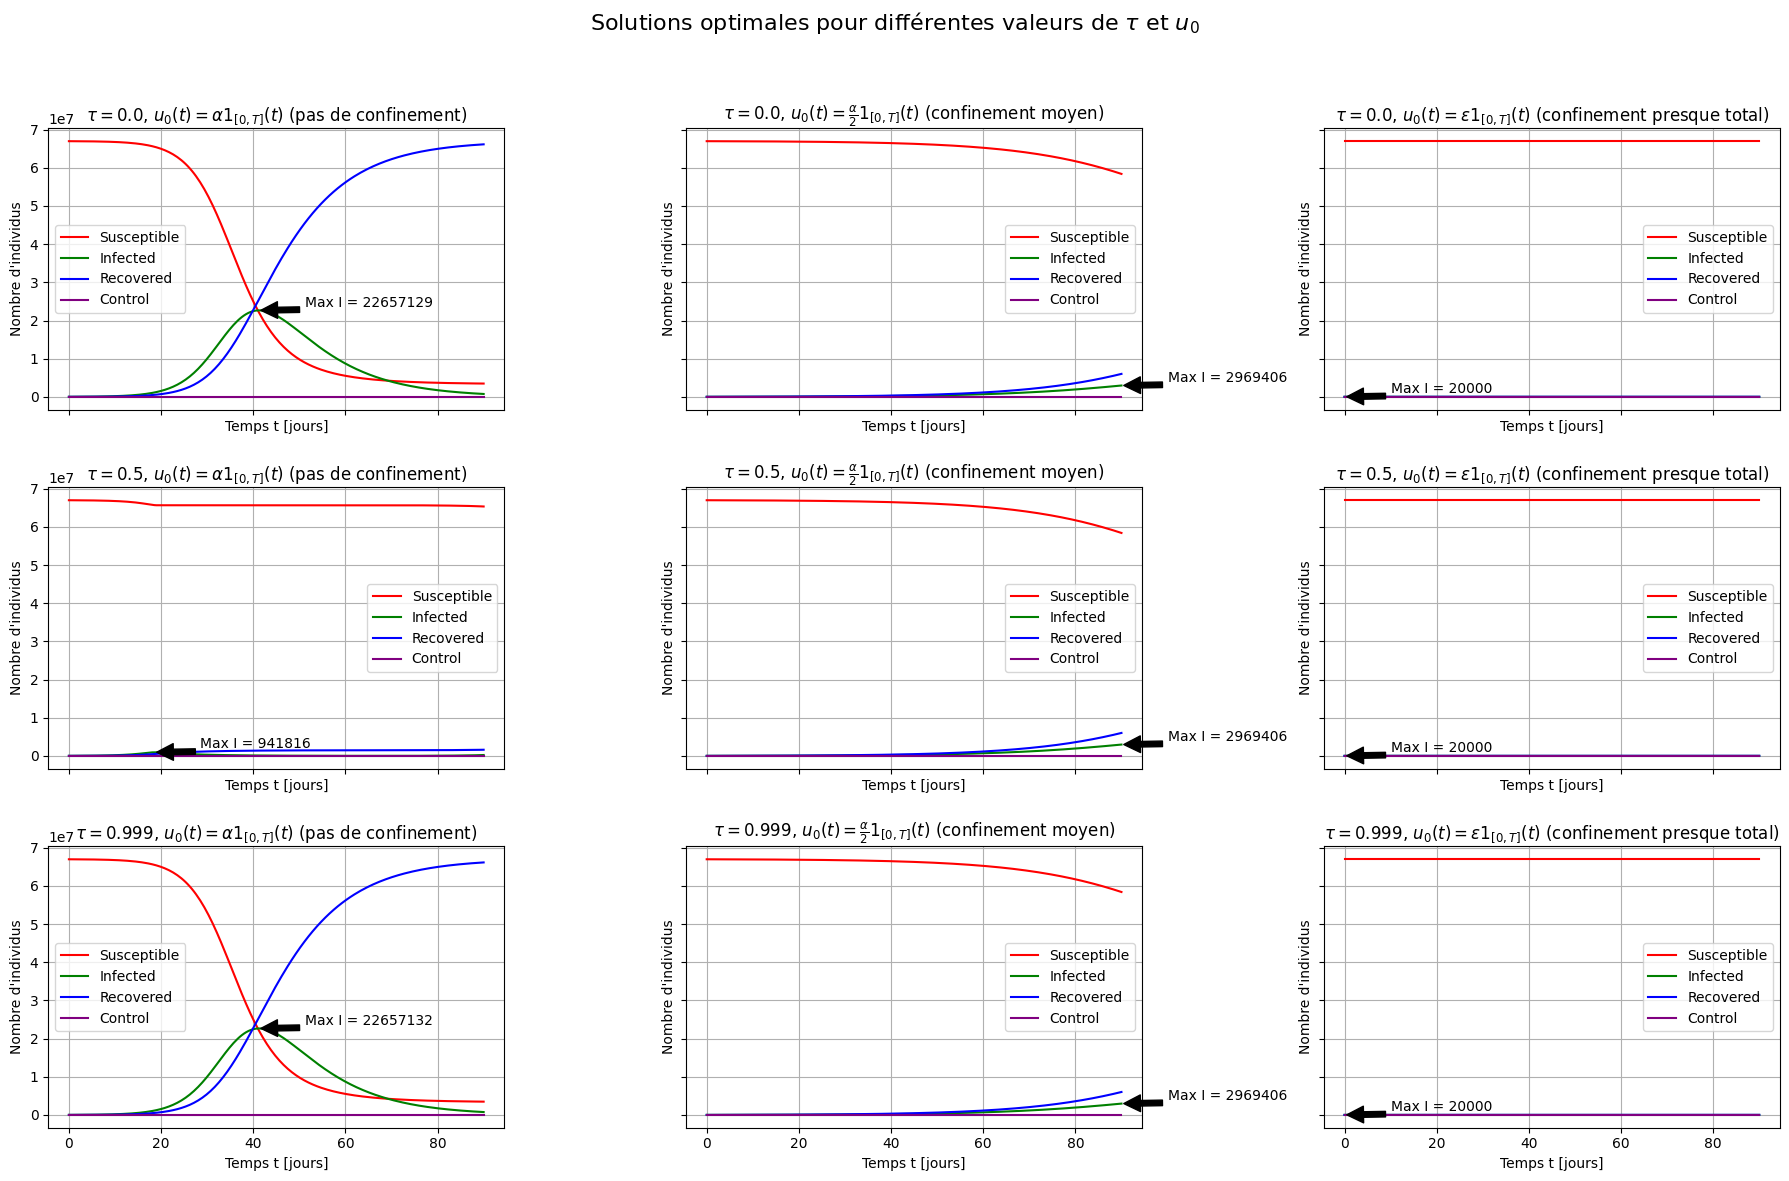

In [190]:
def plot_solutions(tau_values, u_init_values, tval, Nt, N, h, rho0):
    fig, axs = plt.subplots(len(tau_values), 3, figsize=(18, 12), sharex=True, sharey=True)
    fig.suptitle("Solutions optimales pour différentes valeurs de $\\tau$ et $u_0$", fontsize=16)

    u_init_labels = [
        r'$u_0(t) = \alpha 1_{[0,T]}(t)$ (pas de confinement)',
        r'$u_0(t) = \frac{\alpha}{2} 1_{[0,T]}(t)$ (confinement moyen)',
        r'$u_0(t) = \epsilon 1_{[0,T]}(t)$ (confinement presque total)'
    ]

    for i, tau in enumerate(tau_values):
        for j, (u_init, label) in enumerate(zip(u_init_values, u_init_labels)):
            u, S, I, R = Gradien_descent(tau, u_init, Nt, N, h, rho0)
            axs[i, j].plot(tval, S, label='Susceptible', color='red')
            axs[i, j].plot(tval, I, label='Infected', color='green')
            axs[i, j].plot(tval, R, label='Recovered', color='blue')
            axs[i, j].plot(tval, u, label='Control', color='purple')
            
            # Trouver le point maximum de la courbe des infectés (I)
            I_max = np.max(I)
            t_max = tval[np.argmax(I)]
            
            # Ajouter une flèche et annoter le point maximum
            axs[i, j].annotate(f'Max I = {I_max:.0f}', xy=(t_max, I_max), xytext=(t_max + 10, I_max + 1e6),
                               arrowprops=dict(facecolor='black', shrink=0.05))

            axs[i, j].set_title(f'$\\tau={tau}$, {label}')
            axs[i, j].legend()
            axs[i, j].grid(True)

    for ax in axs.flat:
        ax.set(xlabel='Temps t [jours]', ylabel='Nombre d\'individus')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Paramètres de discrétisation
t0 = 0.0
T = 90
NT = int(2e2)
tval = np.linspace(t0, T, NT)
h = T / (NT - 1)
ITER = int(2e4)
# Paramètres du modèle
alpha, beta = 0.32, 0.1
# Conditions initiales de x
S0 = 6.7e7 - 2e4
I0 = 2e4
R0 = 0
N = S0 + I0 + R0
tau_values = [0.0, 0.5, 0.999]
u_init_values = [alpha * np.ones(NT), (alpha / 2) * np.ones(NT), 1e-3 * np.ones(NT)]
rho0 = 1e-14
plot_solutions(tau_values, u_init_values, tval, NT, N, h, rho0)

Les résultats obtenus pour différents $u $ et différents $\tau $ expliquent bien le modèle et sont également logiques par rapport aux données et aux états de traitement (confinement, pas de confinement, confinement fort). Par exemple, pour $u = \alpha $, il est clair que $S $ va diminuer avec le temps et que $I $ atteint son maximum le plus élevé par rapport aux autres cas. De même, pour les différents scénarios de confinement, les résultats montrent des dynamiques cohérentes avec les attentes.

# Question 7:
 Voici quelques pistes si vous souhaitez aller plus loin.

   (a) Représenter sur une figure les points
       $$
       \left( \int_0^T g(u^*_{τ}(t)) \, dt, \int_0^T f(I^*_{τ}(t)) \, dt \right)
       $$
       pour différentes valeurs de $τ ∈ [0, 1]$ (diagramme de Pareto). Comment interpréter ce diagramme ?
       
   (b) Implémenter le problème en utilisant le package Gekko et comparer les résultats obtenus.
   
   (c) Comment modifier ou enrichir la modélisation proposée ? N’hésitez pas à tester les modélisations proposées.

# Réponce
(a) Représenter sur une figure les points
       $$
       \left( \int_0^T g(u^*_{τ}(t)) \, dt, \int_0^T f(I^*_{τ}(t)) \, dt \right)
       $$
       pour différentes valeurs de $τ ∈ [0, 1]$ (diagramme de Pareto). Comment interpréter ce diagramme ? 


In [152]:
# simpson pour calculer l'intégrale
# Fonction L_tau avec la méthode de Simpson de SciPy
def simpson_int(u,dt):
    return simpson(u,dx=dt)
# diagramme de Parreto
def Pareto(tau_list,u_init):
    liste_g = []
    liste_f = []
    for tau in tau_list:
        u, S, I, R = Gradien_descent(tau, u_init, NT, N, h, rho0)
        g_int = simpson_int(fonction_g(alpha, u),h)
        f_int = simpson_int(fonction_f(I),h)
        liste_g.append(g_int)
        liste_f.append(f_int)
    return liste_g,liste_f
def Diagramme_Pareto(liste_g,liste_f ):
    fig, ax = plt.subplots()
    ax.plot(liste_g,liste_f,marker='o',linestyle='-',color='b')
    ax.set_xlabel('g(u)')
    ax.set_ylabel('f(I)')
    ax.set_title('Diagramme de Pareto')
    plt.show()


Diagrame de Pareto sans confinement avec $u = \alpha $  

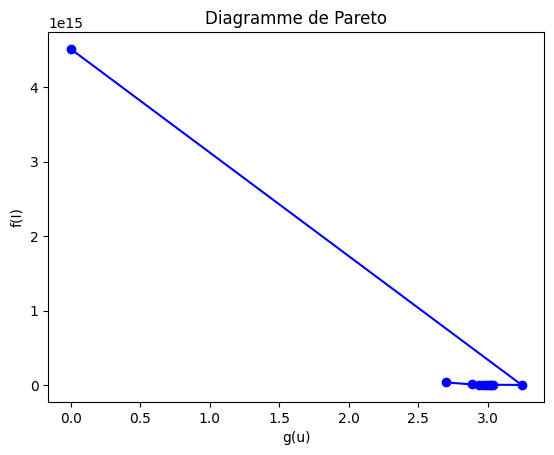

In [156]:
# Paramètres du modèle
alpha, beta = 0.32, 0.1
tau_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
u_init_values = [alpha * np.ones(NT), (alpha / 2) * np.ones(NT), 1e-3 * np.ones(NT)]
# diagramme de Pareto pour u_init = alpha
# print(Pareto(tau_list,u_init_values[0])[1])
Diagramme_Pareto(Pareto(tau_list,u_init_values[0])[0],Pareto(tau_list,u_init_values[0])[1])

Le point obtenu $g(u)=0,f(I)≈5e15)$ est logique pour $u(t)=\alpha$, correspondant à une absence totale de confinement.

Diagrame de Pareto d'un confinement moyen avec $u = \frac{\alpha }{2} $  

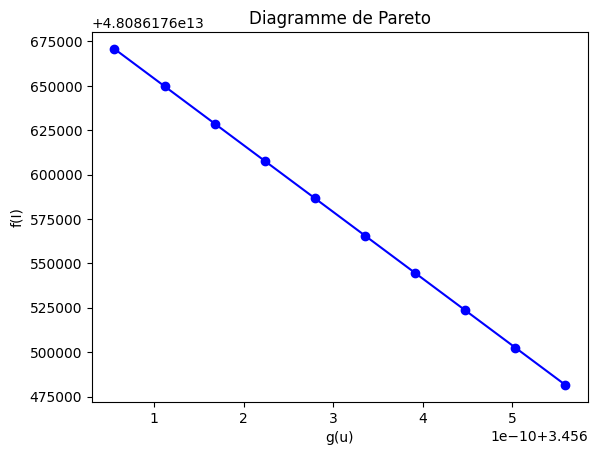

In [157]:
# diagramme de Pareto pour u_init = alpha/2
# Pareto(tau_list,u_init_values[1])
# print(Pareto(tau_list,u_init_values[1]))
Diagramme_Pareto(Pareto(tau_list,u_init_values[1])[0],Pareto(tau_list,u_init_values[1])[1])

Dans ce cas, on observe que pour chaque $\tau$, on obtient une valeur différente de $g$, car il s'agit d'un confinement moyen. De même, le maximum des infectés est inférieur à ce que nous avons trouvé précédemment.

Diagrame de Pareto d'un confinement fort avec $u = \epsilon $  

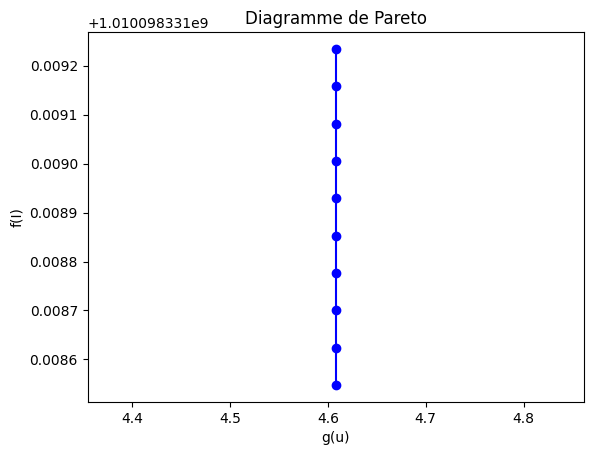

In [158]:
# diagramme de Pareto pour u_init = epsilon
# Pareto(tau_list,u_init_values[2])
# print(Pareto(tau_list,u_init_values[2]))
Diagramme_Pareto(Pareto(tau_list,u_init_values[2])[0],Pareto(tau_list,u_init_values[2])[1])

 (b) Implémenter le problème en utilisant le package Gekko et comparer les résultats obtenus.

In [15]:
# Fonctions g et f
def fonction_g(alpha, u):
    return 0.5 * (alpha**2 - u**2)

def fonction_f(I):
    return 0.5 * I**2

def Gekko_SID(tau, u_init):
    # Initialisation du modèle
    m = GEKKO(remote=False)
    m.time = np.linspace(0, T, NT)
    p = np.zeros(NT)
    p[-1] = 1
    final = m.Param(value=p)
    
    # Variables du modèle
    u = m.MV(value=0, lb=0, ub=alpha)
    u.STATUS = 1
    S = m.Var(value=S0)
    I = m.Var(value=I0)
    R = m.Var(value=R0)
    
    # Equations du modèle
    m.Equation(S.dt() == -u * S * I / N)
    m.Equation(I.dt() == u * S * I / N - (beta * I))
    m.Equation(R.dt() == beta * I)
    # Fonction objectif
    m.Obj((tau * fonction_g(alpha, u) + (1 - tau) * fonction_f(I))* final)
    
    # Résolution du problème
    m.options.IMODE = 6
    m.solve(disp=False)
    
    return m.time, S.value, I.value, R.value, u.value

In [16]:
def plot_solutions_Gekko_single_init(tau_values, u_init):
    fig, axs = plt.subplots(1, len(tau_values), figsize=(12, 2 * len(tau_values)), sharex=True)
    fig.suptitle("Solutions optimales pour différentes valeurs de $\\tau$", fontsize=16)

    for i, tau in enumerate(tau_values):
        try:
            t, S, I, R, u = Gekko_SID(tau, u_init)
            axs[i].plot(t, S, label='Susceptible', color='orange')
            axs[i].plot(t, I, label='Infected', color='red')
            axs[i].plot(t, R, label='Recovered', color='green')
            axs[i].plot(t, u, label='Control', color='blue')
            axs[i].set_title(f'$\\tau={tau}$')
            axs[i].legend()
            axs[i].grid(True)
        except Exception as e:
            print(f"Erreur pour tau={tau}: {str(e)}")

    for ax in axs.flat:
        ax.set(xlabel='Temps t [jours]', ylabel='Nombre d\'individus')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


Résultat d'un confinement avec $u = \alpha $  

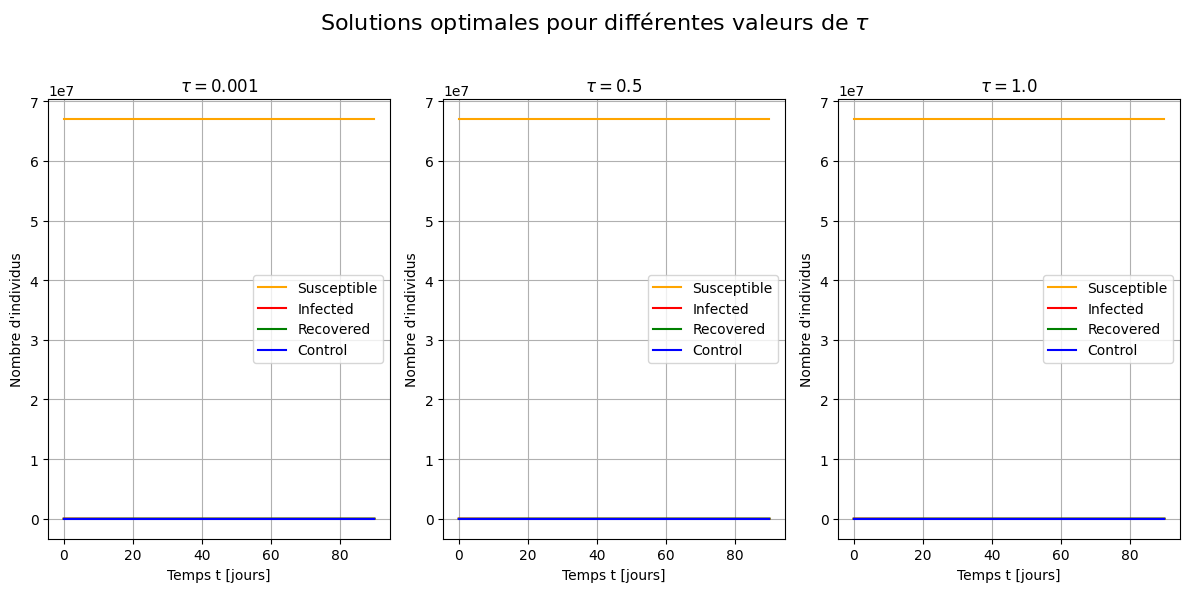

In [17]:
# Paramètres de discrétisation
T = 90
NT = int(2e2)
tval = np.linspace(t0, T, NT)
h = T  / (NT - 1)
ITER = int(2e4)
# Paramètres du modèle
alpha, beta = 0.16, 0.1
# Conditions initiales de x
S0 = 6.7e7 - 2e4
I0 = 2e4
R0 = 0
N = S0 + I0 + R0
tau_values = [0.001, 0.5, 1.0]
u_init = alpha* np.ones(NT)
rho0 = 0.1

plot_solutions_Gekko_single_init(tau_values, u_init)

Résultat d'un confinement moyen avec $u = \frac{\alpha }{2} $  

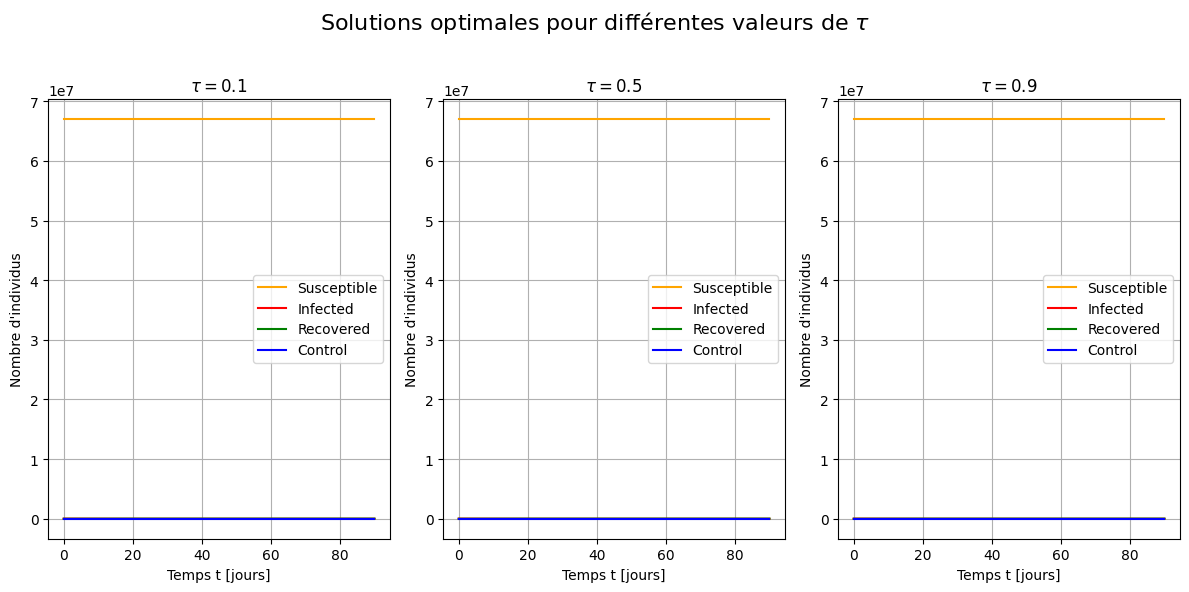

In [18]:
# Paramètres de discrétisation
T = 90
NT = int(2e2)
tval = np.linspace(t0, T, NT)
h = T / (NT - 1)
ITER = int(2e4)
# Paramètres du modèle
alpha, beta = 0.32, 0.1
# Conditions initiales de x
S0 = 6.7e7 - 2e4
I0 = 2e4
R0 = 0
N = S0 + I0 + R0
tau_values = [0.1, 0.5, 0.9]
u_init = (alpha/2) * np.ones(NT)
rho0 = 0.1

plot_solutions_Gekko_single_init(tau_values, u_init)

Résultat d'un confinement fort avec $u = \epsilon $  

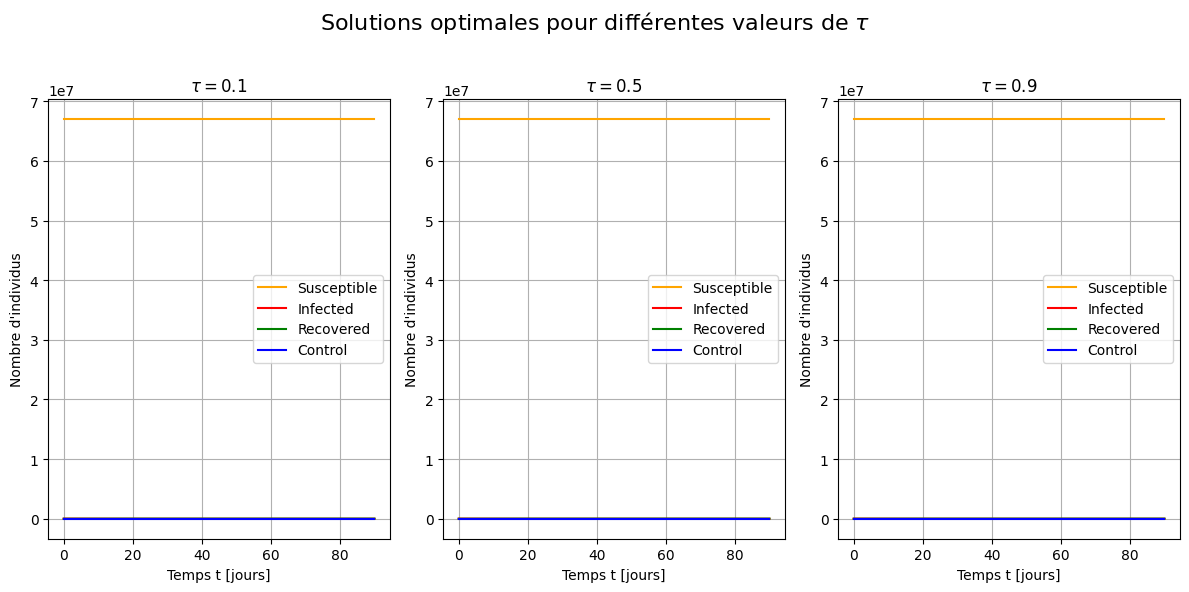

In [19]:
# Paramètres de discrétisation
T = 90
NT = int(2e2)
tval = np.linspace(t0, T, NT)
h = T / (NT - 1)
ITER = int(2e4)
# Paramètres du modèle
alpha, beta = 0.32, 0.1
# Conditions initiales de x
S0 = 6.7e7 - 2e4
I0 = 2e4
R0 = 0
N = S0 + I0 + R0
tau_values = [0.1, 0.5, 0.9]
u_init = 1e-3 * np.ones(NT)
rho0 = 0.1

plot_solutions_Gekko_single_init(tau_values, u_init)

Les résultats obtenus avec Gekko ne sont pas efficaces, surtout pour le cas où il n'y a pas de confinement. Ces résultats montrent que pour chaque modèle et chaque problème, il existe des méthodes spécifiques à utiliser pour les résoudre.

(c) Comment modifier ou enrichir la modélisation proposée ? N’hésitez pas à tester les modélisations proposées.

# Modèle SEAIR
Je me suis inspiré de ce site.: http://covid-ete.ouvaton.org/Rapport3_Modele.html#contexte

Pour enrichir la modélisation proposée nous utilisons le  modèle SEAIR est une extension du modèle SIR qui inclut des compartiments supplémentaires pour les personnes exposées $E$ et asymptomatiques $A$. Voici les équations différentielles du modèle SEAIR :

$$
\begin{cases} 
S'(t) = -u(t) \frac{S(t) (A(t) + I(t))}{N}, & t \geq 0 \\
E'(t) = u(t) \frac{S(t) (A(t) + I(t))}{N} - \epsilon E(t) \\
A'(t) = \epsilon E(t) - \sigma A(t) \\
I'(t) = \sigma A(t) - \beta I(t) \\
R'(t) = \beta I(t) 
\end{cases}
$$

où :

- $ S(t) $ est le nombre de personnes susceptibles au temps $ t $.
- $ E(t) $ est le nombre de personnes exposées au temps $ t $.
- $ A(t) $ est le nombre de personnes asymptomatiques au temps $ t $.
- $ I(t) $ est le nombre de personnes infectieuses au temps $ t $.
- $ R(t) $ est le nombre de personnes retirées (guéries ou décédées) au temps $ t $.
- $ u(t) $ est la fonction de contrôle représentant les mesures de restriction.
- $ \epsilon $ est le taux de fin de latence.
- $ \sigma $ est le taux d'apparition des symptômes.
- $ \beta $ est le taux de transmission des symptomatiques.


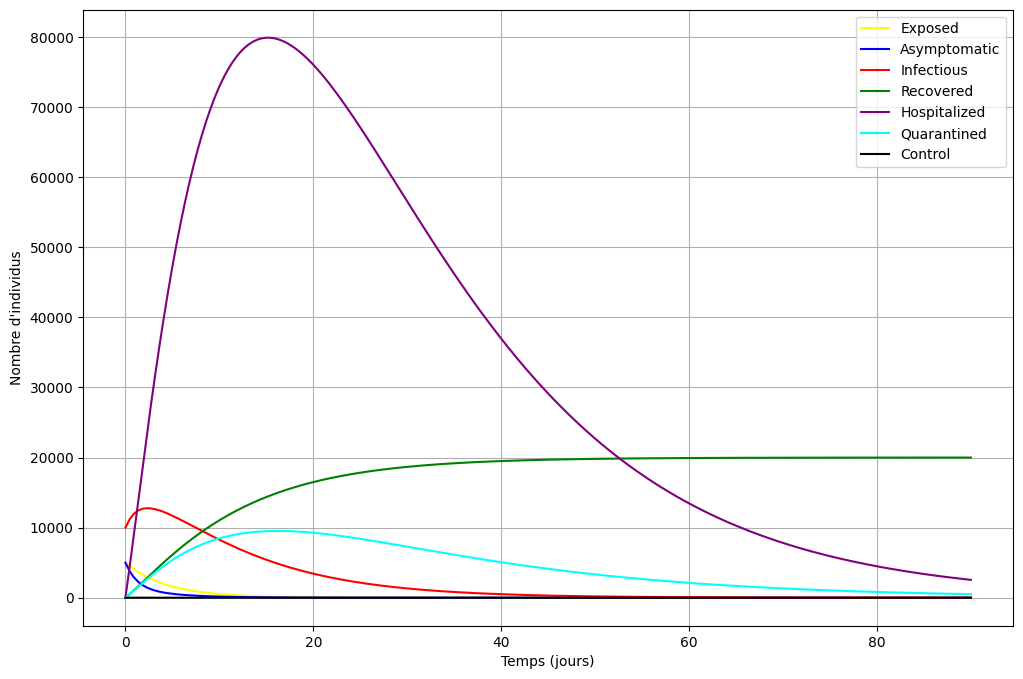

In [20]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle
alpha = 1
beta = 0.1
epsilon = 1/4.2
sigma = 1
gamma1 = 1/17
gamma2 = 1/20
p = 0.9
theta = 0.15
N = 6.7e7
S0 = N - 2e4
E0 = 0.5e4
A0 = 0.5e4
I0 = 1e4
R0 = 0
T = 90
NT = int(2e2)
tau = 0.5

# Initialisation du modèle
m = GEKKO(remote=False)
m.time = np.linspace(0, T, NT)

# Variables du modèle
S = m.Var(value=S0)
E = m.Var(value=E0)
A = m.Var(value=A0)
I = m.Var(value=I0)
R = m.Var(value=R0)
H = m.Var(value=0)  # Hospitalized
Q = m.Var(value=0)  # Quarantined
u = m.MV(value=0, lb=0, ub=alpha)
u.STATUS = 1

# Équations du modèle
m.Equation(S.dt() == -u * S * (A + I) / N)
m.Equation(E.dt() == u * S * (A + I) / N - epsilon * E)
m.Equation(A.dt() == epsilon * E - sigma * A)
m.Equation(I.dt() == sigma * A - beta * I)
m.Equation(R.dt() == beta * I)
m.Equation(H.dt() == p * I - gamma1 * H)
m.Equation(Q.dt() == (1 - p) * I - gamma2 * Q)

# Fonction objectif
infection_cost = m.Var()
economic_cost = m.Var()
m.Equation(infection_cost == m.integral(0.5*(I)**2))
m.Equation(economic_cost == m.integral((alpha - u)**2))
m.Obj((1 - tau) *infection_cost + tau *economic_cost)

# Résolution du problème
m.options.IMODE = 6
m.solve(disp=False)

# Affichage des résultats
plt.figure(figsize=(12, 8))
# plt.plot(m.time, S.value, label='Susceptible', color='orange')
plt.plot(m.time, E.value, label='Exposed', color='yellow')
plt.plot(m.time, A.value, label='Asymptomatic', color='blue')
plt.plot(m.time, I.value, label='Infectious', color='red')
plt.plot(m.time, R.value, label='Recovered', color='green')
plt.plot(m.time, H.value, label='Hospitalized', color='purple')
plt.plot(m.time, Q.value, label='Quarantined', color='cyan')
plt.plot(m.time, u.value, label='Control', color='black')
plt.xlabel('Temps (jours)')
plt.ylabel('Nombre d\'individus')
plt.legend()
plt.grid()
plt.show()

Même avec ce modèle, Gekko présente les mêmes problème